In [85]:
import numpy
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline

In [187]:
class NeuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #Architecture
        self.inputnodes = inputnodes
        self.hiddennodes = hiddennodes
        self.outputnodes = outputnodes
        
        #learningrate
        self.learningrate = learningrate
        
        #Weights
        self.wih = numpy.random.normal(0, pow(self.hiddennodes,-0.5), (self.hiddennodes, self.inputnodes))
        self.who = numpy.random.normal(0, pow(self.outputnodes,-0.5), (self.outputnodes, self.hiddennodes))
        
        #Activation function is the sigmoid function
        self.activationfunction = lambda x: scipy.special.expit(x)
        pass
    
    def train(self, targets_list, inputs_list):
        #Make data into numpy format
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        #Feed forward
        hiddeninputs = numpy.dot(self.wih, inputs)
        hiddenoutputs = self.activationfunction(hiddeninputs)
        outputinputs = numpy.dot(self.who, hiddenoutputs)
        outputs = self.activationfunction(outputinputs)
        #Calculate error
        output_error = numpy.subtract(targets, outputs)
        
        errors_hidden = numpy.dot(self.who.T, output_error)
        self.who += self.learningrate * numpy.dot((output_error*outputs*(1-outputs)), numpy.transpose(hiddenoutputs))
        self.wih += self.learningrate * numpy.dot((errors_hidden*hiddenoutputs*(1-hiddenoutputs)), numpy.transpose(inputs))
        pass
    
    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hiddeninputs = numpy.dot(self.wih, inputs)
        hiddenoutputs = self.activationfunction(hiddeninputs)
        
        outputinputs = numpy.dot(self.who, hiddenoutputs)
        outputs = self.activationfunction(outputinputs)
        return outputs

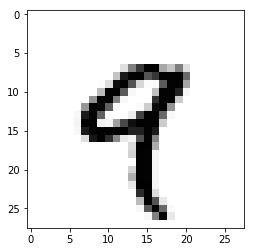

In [174]:
all_values = data_list[4].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation='None')

In [193]:
path_train = "data/mnist_train_100.csv"
path_test = "data/mnist_test_10.csv"

data_file = open(path_train)
data_list = data_file.readlines()
data_file.close()

#Number of input, hidden and output nodes
input_nodes = 28**2
hidden_nodes = 100
output_nodes = 10
# learning rate is 0.3
learning_rate = 0.3
# create instance of neural network
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

#Train the network
for i in range(100):
    all_values = data_list[i].split(',')
    inputs = numpy.array(all_values[1:]).astype(np.float)
    scaled_inputs = (inputs/255 * 0.99)+0.01
    target = numpy.zeros((output_nodes, 1)) + 0.01
    target[int(all_values[0])] = 0.99
    n.train(numpy.transpose(target), scaled_inputs)

In [195]:
data_file = open(path_train)
data_list = data_file.readlines()
data_file.close()

for i in range(10):
    all_values = data_list[i].split(',')
    inputs = numpy.array(all_values[1:]).astype(np.float)
    scaled_inputs = (inputs/255 * 0.99)+0.01
    target = numpy.zeros((output_nodes, 1)) + 0.01
    target[int(all_values[0])] = 0.99
    print(target)
    print(n.query(scaled_inputs))

[[0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.99]
 [0.01]
 [0.01]
 [0.01]
 [0.01]]
[[0.05274688]
 [0.02120046]
 [0.01285266]
 [0.07466365]
 [0.00205191]
 [0.01124535]
 [0.021163  ]
 [0.05665234]
 [0.08506255]
 [0.00644826]]
[[0.99]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]]
[[0.96685178]
 [0.00774683]
 [0.02384298]
 [0.0404807 ]
 [0.01628135]
 [0.0182283 ]
 [0.02726651]
 [0.10183127]
 [0.0352784 ]
 [0.00382768]]
[[0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.99]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]]
[[0.01740733]
 [0.00358022]
 [0.00726486]
 [0.06620443]
 [0.99351605]
 [0.02077336]
 [0.22537612]
 [0.05940295]
 [0.05934343]
 [0.00348697]]
[[0.01]
 [0.99]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]]
[[0.01015892]
 [0.93838843]
 [0.02029299]
 [0.03567015]
 [0.02187015]
 [0.05165078]
 [0.01131424]
 [0.02306943]
 [0.25602694]
 [0.00369994]]
[[0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.01]
 [0.99]]
[[0.01889507]
 [0.01950428]
 [0

In [ ]:
plt.imshow(numpy.asfarray(scaled_inputs).reshape(28,28), cmap="Greys")